In [235]:
# Titanic: Machine Learning from Disaster

#about competition: https://www.kaggle.com/c/titanic
#data: https://www.kaggle.com/c/titanic/data
#leaderboard: https://www.kaggle.com/c/titanic/leaderboard
#my latest submission: https://www.kaggle.com/c/titanic/leaderboard?submissionId=2590117

import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [236]:
#cleaning data plus a bit of feature engineering
def feature_eng(df):
    tit = pd.DataFrame()
    if 'Survived' in df.columns:
        tit['survived'] = df['Survived']
    tit['class'] = df['Pclass']
    #Sex: to number
    tit['sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    #Age: NaN to mean
    tit['age'] = df['Age'].fillna(df['Age'].mean())
    #Fare: NaN to mean
    tit['fare'] = df['Fare'].fillna(df['Fare'].mean())
    #Cabin: NaN to zero, first letter to number
    tit['cabin'] = df['Cabin']
    tit['cabin'] = tit['cabin'].map(lambda x: '0' if pd.isnull(x) else x[0])
    tit['cabin'] = tit['cabin'].map( {'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8} ).astype(int)
    #Embarked: NaN to zero, letter to number
    tit['embark'] = df['Embarked'].map( {NaN: '0', 'C': 1, 'Q': 2, 'S': 3} ).astype(int)

    #Add new silly features
    #Family size
    tit['family_size'] = df['SibSp'] + df['Parch']
    #Missing Age
    tit['mis_age'] = pd.isnull(df.Age).astype(int)
    #Missing Cabin
    tit['mis_cabin'] = pd.isnull(df.Cabin).astype(int)
    #Missing Embarked
    tit['mis_embark'] = pd.isnull(df.Embarked).astype(int)

    return(tit)

df_train = feature_eng(df_train)
df_test = feature_eng(df_test)

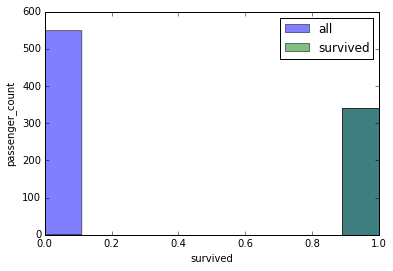

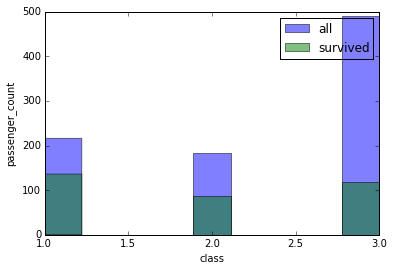

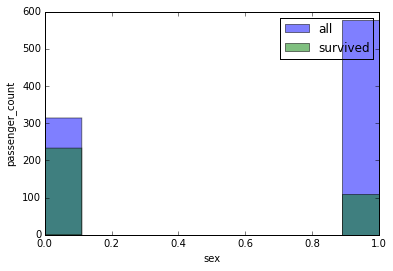

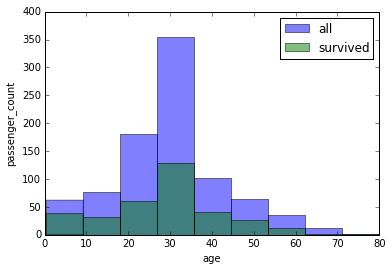

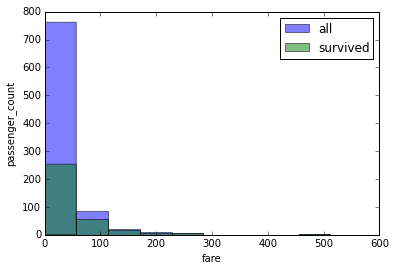

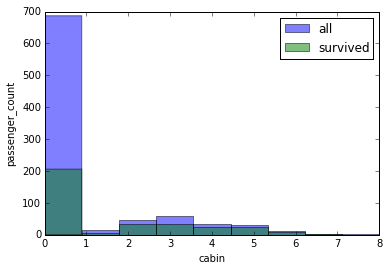

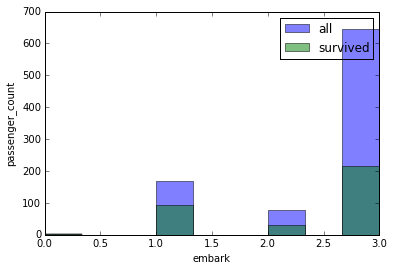

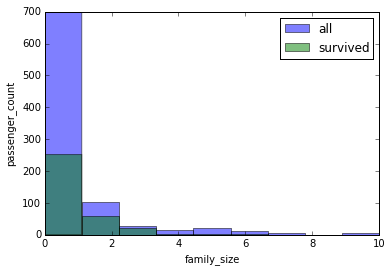

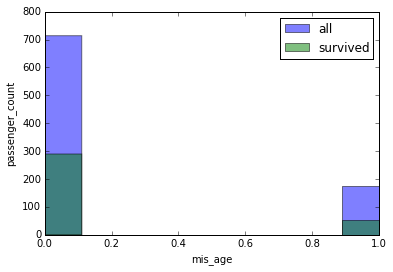

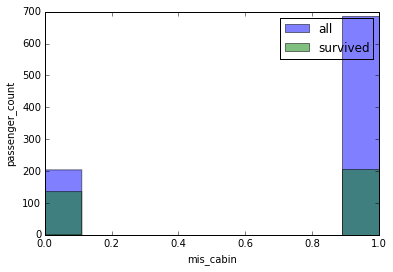

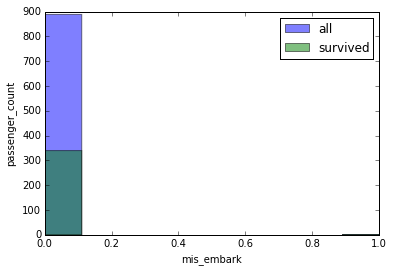

In [237]:
#plot histograms with survival per feature
for col in df_train.columns:
    bins = numpy.linspace(df_train[col].min(), df_train[col].max(), 10)
    plt.hist(df_train[col], bins, alpha=0.5, label='all')
    plt.hist(list(df_train[df_train['survived'] == 1][col]), bins, alpha=0.5, label='survived')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('passenger_count')
    plt.show()

In [238]:
#transform pandas dataframe to numpy array for sklearn package
train_data = df_train.values
test_data = df_test.values

In [239]:
#import random forest package
from sklearn.ensemble import RandomForestClassifier 

#create random forest object which will include all the parameters for the fit
forest = RandomForestClassifier(n_estimators = 100)

#fit training data to the survived labels and create decision trees
forest = forest.fit(train_data[0::,1::],train_data[0::,0])

In [240]:
submit = pd.DataFrame()
submit['PassengerId'] = range(892, 1310, 1)
#take the same decision trees and run it on test data
submit['Survived'] = forest.predict(test_data)
#export the result to csv in expected format
submit.to_csv('submission.csv', index=False)